**FOUNDATIONS OF MACHINE LEARNING**

**Fundamentals of PyTorch**

PyTorch and scikit-learn serve different purposes in the field of machine learning. They are designed for different tasks for different needs:

* PyTorch:
    - Use Case: PyTorch is primarily a deep learning framework that is well-suited for building and training neural networks. It is commonly used for tasks such as image recognition, natural language processing, and other complex machine learning tasks that benefit from deep learning models.
    - Strengths: PyTorch's dynamic computational graph, flexibility, and strong support for GPU acceleration make it particularly suitable for research and experimentation in deep learning. It is widely used in the academic and research community.

* scikit-learn:
    - Use Case: scikit-learn is a machine learning library that focuses on traditional machine learning algorithms and provides tools for data preprocessing, feature selection, model evaluation, and more. It is suitable for a wide range of machine learning tasks, especially in scenarios where deep learning may be overkill or impractical due to data size or simplicity of the problem.
    - Strengths: scikit-learn is known for its simplicity, ease of use, and a wide range of implemented machine learning algorithms. It is often used in industry and for tasks that do not require the complexity of deep learning models.

The choice between PyTorch and scikit-learn depends on the nature of the task at hand. If you are working on a project that involves deep learning and neural networks, PyTorch would be a more appropriate choice. If your task is more focused on traditional machine learning algorithms and your dataset is not particularly large or complex, scikit-learn might be a more straightforward and efficient solution.

In some cases, a combination of both PyTorch and scikit-learn might be used, leveraging the strengths of each library for different stages of a machine learning pipeline.


If you want to use PyTorch locally, you should have gone through the [PyTorch setup steps](https://pytorch.org/get-started/locally/). However, if you're running on Google Colab, everything should work (Google Colab comes with PyTorch and other libraries installed).

Firstly, import PyTorch and check the version we are using.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import torch
torch.__version__

'2.9.1'

# **INTRODUCTION TO TENSORS**





…Tensors are specialized data structure that are very similar to array and matrices. We can use tensors to encode inputs and outputs of a model, as well as the model's parameters.

Tensors are similar to numpy arrays. The mainly differ for two reasons:


1.   they can run on GPUs to accelerate computation;
2.   they are optimized for [automatic differentation](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html).

**Initializing a Tensor**

In [3]:
!pwd

/Users/matteoattimonelli/Desktop/Didattica/ML/FML25-26/FML_06


In [4]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data) # directly from data
print(f"First Tensor: \n {x_data} \n")

np_array = np.array(data)
x_np = torch.from_numpy(np_array) # from numpy arrays
print(f"From Numpy: \n {x_data} \n")

# with random or constant values
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

First Tensor: 
 tensor([[1, 2],
        [3, 4]]) 

From Numpy: 
 tensor([[1, 2],
        [3, 4]]) 

Random Tensor: 
 tensor([[0.0584, 0.5333, 0.3872],
        [0.4520, 0.9328, 0.9698]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


**Attributes of a Tensor**

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [5]:
tensor = torch.rand(3,4)
print(f"Tensor: {tensor}")
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Tensor: tensor([[0.9978, 0.1128, 0.9983, 0.5242],
        [0.4115, 0.5651, 0.4953, 0.1764],
        [0.1191, 0.5186, 0.2606, 0.4016]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


As you can see, our tensor is stored on the CPU. Indeed, by default, tensors are created on the CPU.  

As said before, PyTorch allows to run tensors on GPUs for faster computations. We need to explicitly move tensors to the GPU after checking for the  GPU availability. If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU.

PyTorch supports GPU use through CUDA. Indeed, GPUs are originally designed to handle graphics and real-time rendering, but thanks to the CUDA architecture, they can be leveraged for a wide range of scientific and machine learning computations. CUDA, which stands for Compute Unified Device Architecture, is a parallel computing platform and application programming interface (API) model created by NVIDIA.



In [6]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda") # If we have more GPUs, we can specify the GPU ID.
    
if torch.backends.mps.is_available():
    tensor = tensor.to("mps")

print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: mps:0


**Some operations on Tensors**

You can check more operations [here](https://pytorch.org/docs/stable/torch.html).

*   Standard numpy-like indexing and slicing:







In [7]:
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[:,-1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([0.9978, 0.1128, 0.9983, 0.5242], device='mps:0')
First column: tensor([0.9978, 0.4115, 0.1191], device='mps:0')
Last column: tensor([0.5242, 0.1764, 0.4016], device='mps:0')
tensor([[0.9978, 0.0000, 0.9983, 0.5242],
        [0.4115, 0.0000, 0.4953, 0.1764],
        [0.1191, 0.0000, 0.2606, 0.4016]], device='mps:0')




*   Joining tensors



In [8]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[0.9978, 0.0000, 0.9983, 0.5242],
        [0.4115, 0.0000, 0.4953, 0.1764],
        [0.1191, 0.0000, 0.2606, 0.4016],
        [0.9978, 0.0000, 0.9983, 0.5242],
        [0.4115, 0.0000, 0.4953, 0.1764],
        [0.1191, 0.0000, 0.2606, 0.4016],
        [0.9978, 0.0000, 0.9983, 0.5242],
        [0.4115, 0.0000, 0.4953, 0.1764],
        [0.1191, 0.0000, 0.2606, 0.4016]], device='mps:0')




*   Arithmetic operations



In [9]:
# Matrix multiplication between two tensors.
# @ and tensor.matmul are equivalent
# tensor.T is the transpose of a tensor

y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

print(y1)
print(y2)

tensor([[2.2669, 0.9976, 0.5895],
        [0.9976, 0.4458, 0.2489],
        [0.5895, 0.2489, 0.2433]], device='mps:0')
tensor([[2.2669, 0.9976, 0.5895],
        [0.9976, 0.4458, 0.2489],
        [0.5895, 0.2489, 0.2433]], device='mps:0')


In [10]:
# Element-wise product between two tensors.
# * and tensor.mul are equivalent

z1 = tensor * tensor
z2 = tensor.mul(tensor)

print(z1)
print(z2)

tensor([[0.9956, 0.0000, 0.9965, 0.2748],
        [0.1694, 0.0000, 0.2453, 0.0311],
        [0.0142, 0.0000, 0.0679, 0.1612]], device='mps:0')
tensor([[0.9956, 0.0000, 0.9965, 0.2748],
        [0.1694, 0.0000, 0.2453, 0.0311],
        [0.0142, 0.0000, 0.0679, 0.1612]], device='mps:0')




*   Single-element tensors



In [16]:
agg = tensor.sum() # sum the elements of the tensor
agg_item = agg.item() # you can access to the element of the tensor having one value
print(agg_item, type(agg_item))

4.7728447914123535 <class 'float'>


# **AUTOMATIC DIFFERANTIATION WITH torch.autograd**

PyTorch's Autograd feature is part of what make PyTorch flexible and fast for building machine learning projects.

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called `torch.autograd`. It allows for the rapid and easy computation of multiple partial derivatives (gradients) over a complex computation.

How does autograd work?

It traces the computation dynamically at runtime, building a **computational graph**.

Let's start with a simple example to understand how autograd works.

We define a tensor full of evenly spaced values on the interval [0,2π], and specify `requires_grad=True`. Setting this flag means that in every computation that follows, autograd will be accumulating the history of the computation in the output tensors of that computation.

In [11]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


Note that the default value of `requires_grad` is `False`. Indeed, if we take any other tensor computed in the previous Section, it is `False` since we did not specify it as `True`.

In [12]:
t1.requires_grad

False

Let's perform some computations on `a`.

In [13]:
b = torch.sin(a)
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


We can plot the tensor `b` computed. This operation does not require to memorize the performed operation on the tensor to compute derivatives. Then, we need to disable the gradient tracking to plot our tensor.

We do this in the cases in which we do not need to track the computational history for gradient computation.

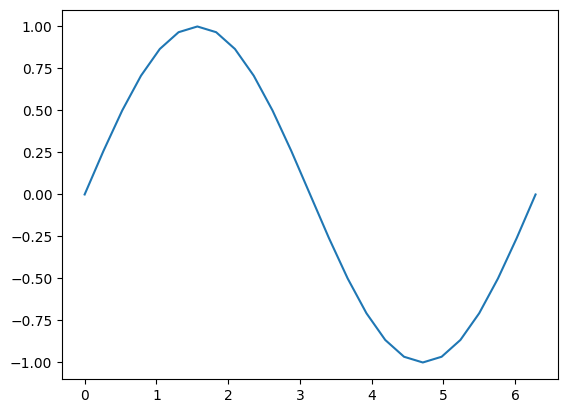

In [14]:
with torch.no_grad():
  plt.plot(a, b)

# or equivalent:
# plt.plot(a.detach(), b.detach())

Let's compute some other operations.

In [15]:
c = 2 * b
print(c)
d = c + 1
print(d)
out = d.sum()
print(out)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)
tensor(25., grad_fn=<SumBackward0>)


Each `grad_fn` stored with our tensors allows you to walk the computation all the way back to its inputs with its `next_functions` property. By exploiting the `next_functions` property on `d`, we can check the gradient functions for all the prior tensors. Note that `a.grad_fn` is reported as `None`, indicating that this was an input to the function with no history of its own.

In [16]:
print('out:')
print(out.grad_fn)
print(out.grad_fn.next_functions)
print(out.grad_fn.next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)

print('\na:')
print(a.grad_fn)

out:
((<AddBackward0 object at 0x1189b3790>, 0),)
((<MulBackward0 object at 0x1189c1060>, 0), (None, 0))
((<SinBackward0 object at 0x1189845b0>, 0), (None, 0))
((<AccumulateGrad object at 0x1189845b0>, 0),)
()

a:
None


At this point, we have built the computational graph. How do we get derivatives? We call the `backward()` method on the output, and check the input's `grad` property to inspect the gradients.

Be aware that only leaf nodes of the computation have their gradients computed. If you try, for example, `print(c.grad)` you'd get back `None`. In this simple example, only the input is a leaf node, so only it has gradients computed.

In [17]:
out.backward()
print(a.grad)

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


Plot the derivative.

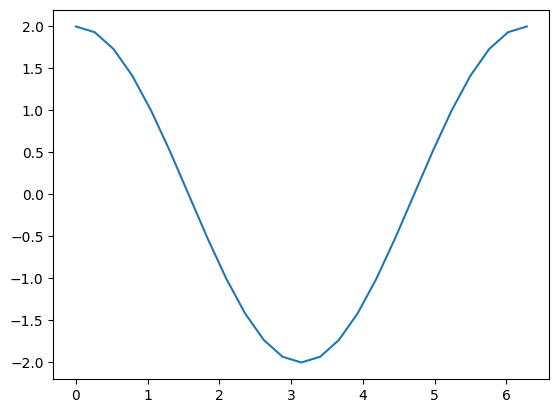

In [18]:
plt.plot(a.detach(), a.grad.detach())

# **Neural Network for Binary Classification: diabetes.csv**



Now, we see how to build a simple neural network in PyTorch for a classification task.

We use the `diabetes.csv` dataset.

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
import torch

# Load dataset
diabetes = pd.read_csv('datasets/diabetes.csv')
print(diabetes.head())
X = diabetes.drop(['Outcome'], axis=1).values
y = diabetes['Outcome'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature normalization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


We've got some data ready, now it's time to build a model.

We'll break it down into a few parts.

1.   Set up device agnostic code (so our model can run on CPU or GPU)
2.   Construct a neural network (subclass of `nn.Module`)
3.   Define a loss function and an optimizer
4.   Create a training loop

Let's start by importing `nn` and setting up device agnostic code.



In [50]:
from torch import nn
from torch import optim
device = "cuda" if torch.cuda.is_available() else "cpu"
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In PyTorch, `nn` stands for neural network. It is a module that provides classes and functions to help you define and train neural networks. The `nn` module in PyTorch includes various pre-defined layers, loss functions, and other components commonly used in the construction of neural networks.

When you define your neural network architecture, you typically create a class that subclasses `nn.Module` and define the layers and operations within the `__init__` and `forward` methods.

We will first use `SimpleNN_1` to make predictions. This network is trained with a non-linear activation function (the Sigmoid).

In [51]:
class SimpleNN_1(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN_1, self).__init__() # SimpleNN is a sub-class of nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size) # First layer -> Hidden Layer
        self.fc2 = nn.Linear(hidden_size, output_size) # Hidden Layer -> Output
        self.sigmoid = nn.Sigmoid() # Activation (it is a classification task) -> We produce predictions

    def forward(self, x):
        x = self.fc1(x) # hidden_size
        x = self.sigmoid(x) # [0,1]
        x = self.fc2(x) # Output_size
        x = self.sigmoid(x)
        return x

Then, we will use `SimpleNN_2` to make predictions. This network is trained without the Sigmoid function.

In [52]:
class SimpleNN_2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN_2, self).__init__() # SimpleNN is a sub-class of nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size) # First layer -> Hidden Layer
        # self.sigmoid1 = nn.Sigmoid() # Activation
        self.fc2 = nn.Linear(hidden_size, hidden_size) # Hidden Layer -> Hidden Layer
        self.fc3 = nn.Linear(hidden_size, output_size) # Hidden Layer -> Output
        self.sigmoid = nn.Sigmoid() # Activation (it is a classification task) -> We produce predictions

    def forward(self, x):
        x = self.fc1(x)
        # x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

Just define the accuracy metric to evaluate our neural network.

In [53]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc


Now, we define:

*   the input, hidden, and output size
*   the loss function (how wrong we are with respect to predictions)
*   the optimizer (tells your model how to update its internal parameters to best lower the loss)



In [54]:
torch.manual_seed(42)
non_linearity = True
input_size = X.shape[1]
hidden_size = 50
output_size = 1
if non_linearity == True: # Use NN with non-linear activation function
  model = SimpleNN_1(input_size, hidden_size, output_size).to(device)
else: # Use NN without non-linear activation function
  model = SimpleNN_2(input_size, hidden_size, output_size).to(device)
  
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
# optimizer = optim.SGD(model.parameters(), lr=0.001)  # SGD optimizer
optimizer = optim.AdamW(model.parameters(), lr=0.001)  # SGD optimizer
X_train_std = torch.from_numpy(X_train_std).float().to(device)
X_test_std = torch.from_numpy(X_test_std).float().to(device)
y_train = torch.from_numpy(y_train).float().to(device)
y_test= torch.from_numpy(y_test).float().to(device)

With a loop, we train our model.

In [ ]:
epochs = 3000
for epoch in range(epochs):

In [55]:
  model.train() # we just inform the model that we are training it.
  outputs = model.forward(X_train_std) # we obtain the predictions on training set
  outputs = outputs.squeeze() # we adapt prediction size to our labels
  # print(outputs)
  loss = criterion(outputs, y_train) # compute loss function
  outputs = torch.round(outputs).float() # transform predictions in labels
  acc = accuracy_fn(y_true=y_train,
                          y_pred=outputs)
  # compute loss gradients with respect to model's parameters
  loss.backward()
  # update the model parameters based on the computed gradients.
  optimizer.step()
  # In PyTorch, for example, when you perform backpropagation to compute
  # the gradients of the loss with respect to the model parameters, these
  # gradients accumulate by default through the epochs. Therefore, before
  # computing the gradients for a new batch, it's a common practice to zero
  # them using this line to avoid interference from previous iterations.
  optimizer.zero_grad()
  model.eval() # we just inform the model that we are evaluating it.
  with torch.inference_mode(): # we are doing inference: we don't need to compute gradients
    # 1. Forward pass
    test_outputs = model(X_test_std)
    test_outputs = test_outputs.squeeze()
    test_loss = criterion(test_outputs,
                        y_test)
    test_outputs = torch.round(test_outputs).float()
    # print(test_outputs)
    test_acc = accuracy_fn(y_true=y_test,
                            y_pred=test_outputs)
    # 2. Caculate loss/accuracy


  if (epoch + 1) % 20 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 19 | Loss: 0.64134, Accuracy: 65.15% | Test loss: 0.64011, Test acc: 64.94%
Epoch: 39 | Loss: 0.61964, Accuracy: 65.31% | Test loss: 0.62308, Test acc: 64.29%
Epoch: 59 | Loss: 0.60592, Accuracy: 65.15% | Test loss: 0.61000, Test acc: 64.29%
Epoch: 79 | Loss: 0.59248, Accuracy: 66.94% | Test loss: 0.59721, Test acc: 64.94%
Epoch: 99 | Loss: 0.57931, Accuracy: 67.92% | Test loss: 0.58519, Test acc: 66.88%
Epoch: 119 | Loss: 0.56615, Accuracy: 69.06% | Test loss: 0.57334, Test acc: 70.78%
Epoch: 139 | Loss: 0.55308, Accuracy: 71.34% | Test loss: 0.56164, Test acc: 74.03%
Epoch: 159 | Loss: 0.54035, Accuracy: 72.15% | Test loss: 0.55037, Test acc: 76.62%
Epoch: 179 | Loss: 0.52828, Accuracy: 73.62% | Test loss: 0.53991, Test acc: 75.32%
Epoch: 199 | Loss: 0.51720, Accuracy: 74.92% | Test loss: 0.53066, Test acc: 74.68%
Epoch: 219 | Loss: 0.50732, Accuracy: 74.59% | Test loss: 0.52288, Test acc: 72.73%
Epoch: 239 | Loss: 0.49872, Accuracy: 74.43% | Test loss: 0.51669, Test acc: 74.0

By training our `SimpleNN_1` model, we observe a clear situation of **underfitting**. The model shows poor performance both on training and test set. We can follow some hint to improve a neural network in an underfitting situation:



1.   **Add more layers**: each layer potentially increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network deeper.
2.   **Add more hidden units**: similar to the above, more hidden units per layer means a potential increase in learning capabilities of the model, more hidden units is often referred to as making your neural network wider.
3. **Fitting for longer (more epochs)**: your model might learn more if it had more opportunities to look at the data.
4. **Changing the activation functions**: some data just can't be fit with only straight lines, using non-linear activation functions can help with this. In the future, you will know other activation functions. However, sometimes, data are linearly separable. Then, you should remove activation functions.
5. **Change the learning rate**: the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough.
6. **Change the loss function**: different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem.


In our scenario, in the `SimpleNN_2` model we remove the activation functions (between hidden layers). By training it, you would obtain better performance. This means that the data in the `diabetes.csv` are simply linearly separable. Indeed, when you used a simple logistic regression model, you obtained acceptable performance.





# **Neural Network for Binary Classification: circles**

Now, we see the application of a simple neural network in Pytorch for a binary classification task where the data are non-linearly separable. Then, we generate syntethic data having a shape of a circle.

In [27]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
from sklearn.model_selection import train_test_split

We create syntethic data.

In [28]:
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

print(X)
print(y)

circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


Let's plot the data and we observe that the data we generated have a circle-like shape. This dataset is often what's considered a toy problem (a problem that's used to try and test things out on) in machine learning.

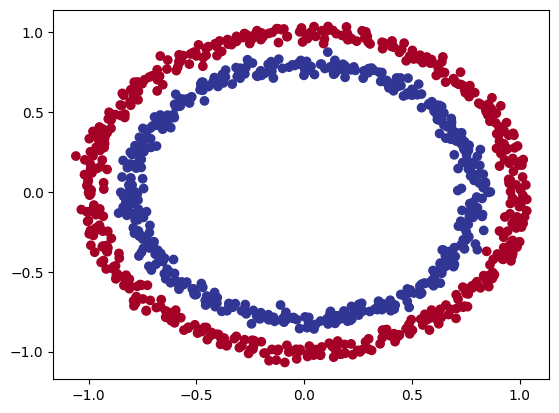

In [29]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

Turn data into tensors and split them into training and test sets.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

Set up device agnostic code.

In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device = "mps" if torch.backends.mps.is_available() else "cpu"


Let's build our model.

In [32]:
class CircleModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_3 = nn.Linear(hidden_size, output_size)
        self.activation = nn.ReLU() # ReLU is an activation function that you will study in the Deep Learning course.
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.activation(x)
        x = self.layer_2(x)
        x = self.activation(x)
        x = self.layer_3(x)
        x = self.sigmoid(x)
        return x

We follow the same steps as before.

In [33]:
torch.manual_seed(42)
input_size = X.shape[1]
hidden_size = 50
output_size = 1
model = CircleModel(input_size, hidden_size, output_size).to(device)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD optimizer
# we do not normalize data because they are toy data already normalized
X_train = torch.from_numpy(X_train).float().to(device)
X_test = torch.from_numpy(X_test).float().to(device)
y_train = torch.from_numpy(y_train).float().to(device)
y_test = torch.from_numpy(y_test).float().to(device)

In [35]:
epochs = 3000
for epoch in range(epochs):
  model.train() # we just inform the model that we are training it.
  outputs = model(X_train) # we obtain the predictions on training set
  outputs = outputs.squeeze() # we adapt prediction size
  # print(outputs)
  loss = criterion(outputs, y_train) # compute loss function
  outputs = torch.round(outputs).float() # transform predictions in labels
  acc = accuracy_fn(y_true=y_train,
                          y_pred=outputs)
  # compute loss gradients with respect to model's parameters
  loss.backward()
  # update the model parameters based on the computed gradients.
  optimizer.step()
  # In PyTorch, for example, when you perform backpropagation to compute
  # the gradients of the loss with respect to the model parameters, these
  # gradients accumulate by default through the epochs. Therefore, before
  # computing the gradients for a new batch, it's a common practice to zero
  # them using this line to avoid interference from previous iterations.
  optimizer.zero_grad()
  model.eval() # we just inform the model that we are evaluating it.
  with torch.inference_mode(): # we are doing inference: we don't need to compute gradients
    # 1. Forward pass
    test_outputs = model(X_test)
    test_outputs = test_outputs.squeeze()
    test_loss = criterion(test_outputs,
                        y_test)
    test_outputs = torch.round(test_outputs).float()
    # print(test_outputs)
    test_acc = accuracy_fn(y_true=y_test,
                            y_pred=test_outputs)
    # 2. Caculate loss/accuracy


  if (epoch + 1) % 20 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 19 | Loss: 0.60717, Accuracy: 96.62% | Test loss: 0.61772, Test acc: 93.00%
Epoch: 39 | Loss: 0.60560, Accuracy: 96.62% | Test loss: 0.61639, Test acc: 93.50%
Epoch: 59 | Loss: 0.60401, Accuracy: 96.75% | Test loss: 0.61504, Test acc: 94.00%
Epoch: 79 | Loss: 0.60239, Accuracy: 96.88% | Test loss: 0.61366, Test acc: 93.50%
Epoch: 99 | Loss: 0.60074, Accuracy: 97.25% | Test loss: 0.61226, Test acc: 93.50%
Epoch: 119 | Loss: 0.59906, Accuracy: 97.50% | Test loss: 0.61083, Test acc: 94.50%
Epoch: 139 | Loss: 0.59736, Accuracy: 97.50% | Test loss: 0.60939, Test acc: 94.50%
Epoch: 159 | Loss: 0.59562, Accuracy: 97.50% | Test loss: 0.60791, Test acc: 94.50%
Epoch: 179 | Loss: 0.59385, Accuracy: 97.75% | Test loss: 0.60641, Test acc: 94.50%
Epoch: 199 | Loss: 0.59205, Accuracy: 98.00% | Test loss: 0.60489, Test acc: 94.50%
Epoch: 219 | Loss: 0.59022, Accuracy: 98.00% | Test loss: 0.60334, Test acc: 96.00%
Epoch: 239 | Loss: 0.58836, Accuracy: 98.25% | Test loss: 0.60176, Test acc: 96.5